### Deep Learning Lab - II
### Name: Durva Deshpande
### Batch: A1
### Roll No: 4
### Aim: Bayesian Network

#### 🔹 1. **Bayesian Networks (BNs)** – Directed Graphical Models

##### ▶ Definition:

A **Bayesian Network** is a **directed acyclic graph (DAG)** where:

* **Nodes** represent random variables.
* **Edges** represent direct probabilistic dependencies (causal or conditional).

Each node $X_i$ is associated with a **conditional probability distribution**:

$$
P(X_i | \text{Parents}(X_i))
$$

The **joint probability distribution** over all variables is given by:

$$
P(X_1, X_2, ..., X_n) = \prod_{i=1}^n P(X_i | \text{Parents}(X_i))
$$

##### ▶ In Deep Learning:

Bayesian ideas are incorporated into DL models to handle **uncertainty and inference**.

##### 🔸 Applications:

* **Bayesian Neural Networks (BNNs):**

  * We place probability distributions over weights rather than fixed values.
  * Allows uncertainty estimation in predictions (useful in medicine, autonomous vehicles).
* **Variational Autoencoders (VAEs):**

  * Latent variables are modeled using BNs.
  * Use **variational inference** to approximate posterior distributions.

In [1]:
pip install pymc

Defaulting to user installation because normal site-packages is not writeable
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 16.4 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 5.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 2.8 MB/s eta 0:00:01
   ------------------ --------------------- 0.8/1.7 MB 2.8 MB/s eta 0:00:01
   ------------------------------- -------- 1.3/1.7 MB 1.9 MB/s eta 0:00:01
   --

In [10]:
# importing libraries
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

#### Problem: Bayesian Linear Regression
We want to model a relationship like:

$$
y = w \cdot x + b + \text{noise}
$$

We assume:

* $w \sim \mathcal{N}(0, 1)$
* $b \sim \mathcal{N}(0, 1)$
* $y \sim \mathcal{N}(w \cdot x + b, \sigma)$, where $\sigma$ is known


In [6]:
# Step 1: Generate synthetic data
np.random.seed(42)
X = np.linspace(0, 1, 50)
true_w, true_b = 2, 1
Y = true_w * X + true_b + np.random.normal(0, 0.1, size=X.shape)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w, b]


C:\Users\DURVA\AppData\Roaming\Python\Python312\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 60 seconds.


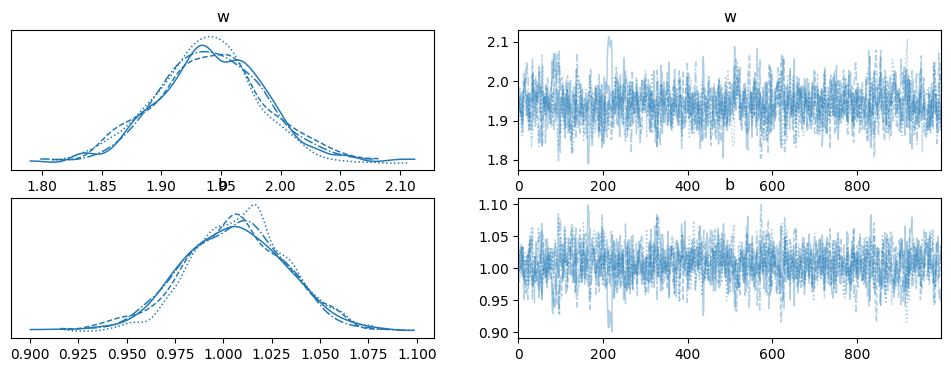

In [8]:
# Step 2: Define Bayesian Model
with pm.Model() as linear_model:
    # Prior on weights and bias
    w = pm.Normal("w", mu=0, sigma=1)
    b = pm.Normal("b", mu=0, sigma=1)

    # Noise term
    sigma = 0.1

    # Expected value of y
    mu = w * X + b

    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=Y)

    # Inference: Use NUTS sampler to draw posterior samples
    trace = pm.sample(1000, return_inferencedata=True)

# Step 3: Plot posterior estimates
pm.plot_trace(trace)
plt.show()

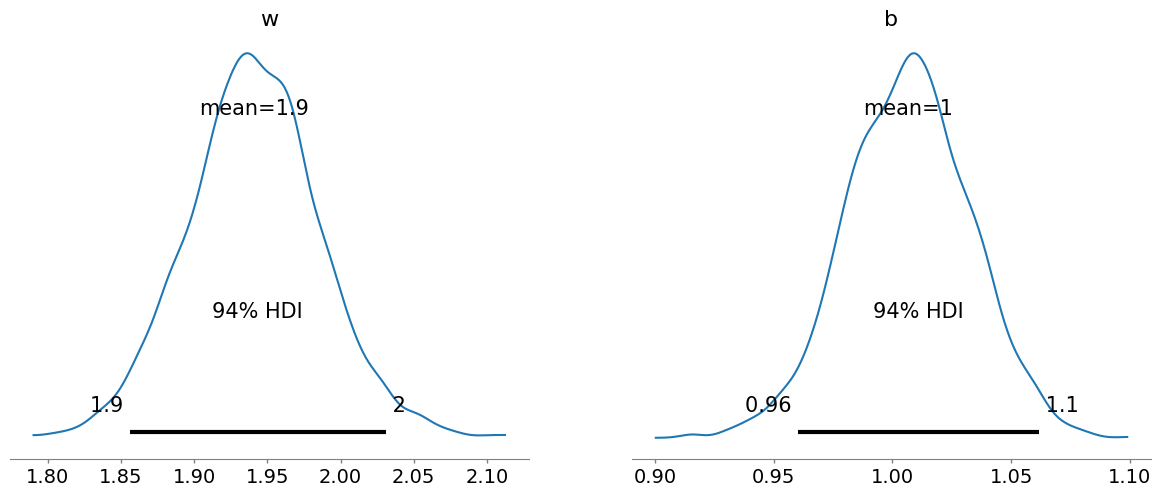

In [9]:
# Predictive Plot
import arviz as az
az.plot_posterior(trace, var_names=["w", "b"])
plt.show()

#### 📈 What This Does:

* Learns posterior distributions of w and b (instead of point estimates like in traditional regression).
* Gives *uncertainty intervals* for predictions.
* Useful in real-world scenarios where uncertainty matters (e.g., medicine, finance).


#### 🔍 What’s Bayesian Here?

* Instead of optimizing weights directly, you *specify priors* and *update beliefs* using observed data.
* The result is a *distribution over parameters*, not a fixed value.

---




#### Problem Statement: Predicting House Prices using Bayesian Regression
We'll use a small subset of the Boston Housing Dataset

In [ ]:
import pandas as pd
import seaborn as sns